# HW11-Neural Networks

### Q1. (2 points))—one answer per group

1)	Explain the dataset you are using in your project. <br />
 a)	Why did you choose that dataset? What do you find interesting in it? What are some major concerns that you have about it?<br />
 b)	What are the features and labels? Is it a regression or classification problem?<br />
What relation between variables are you trying to learn? Why do you think those relations are interesting or important?<br />
 c)	What are your a priori hypotheses about the relations that you will find? Why?<br />
 d)	What would you define as success in this project? Explain.<br />


2)	Explain your analysis<br />
a)	What kind of analysis method (machine-learning algorithms) are you using or do you plan to use? Why do you plan to use those methods over others? <br />
b)	What kind of results (in terms of accuracy or AUC ROC) do you anticipate? Why?


1)
a, b) I chose this dataset because it's something I've been doing development on over the last 5 years. The dataset I'm using are standardised test results across a variety of professional certifications. Data includes information
on which certifications a user has completed, what tests they have taken, how many attempts that they have taken, how many times
they have been recertified, along with demographics such as age, geographic location, and other various metadata.

The sheer quantity and spread of information covering multiple years of testing is what I find most interesting, though I am
a little concerned about properly sifting through the noise and finding the data that is actually relevant to the question Id' like to answer.

The most interesting relations are related to how someone's performance is shared across varying certifications and exams.
Specifically, if someone's performance on one exam can predict their performance on another, unrelated exam in a different series,
that information could be used to market additional tests and certifications that someone may not know they are suited for.

I think this is primarily a regression problem. There is an argument that we are trying to classify each exam as being either
a good fit or not based on past exam experiences.

c) I expect that most of the test results will have some level of correlation to each other, though to what level is hard to tell.
I also expect that tests within the same series and certification track will have the highest correlation between results, and will
be easier to predict results between them. Mainly because the tests within a series are often related to a similar subject matter,
just as series are related to the certifications that they are tied to.

d) If I am able able to pull a meaningful result from the large dataset, I will consider that a success. I think the end product
will be a type of relationship matrix with exams on an axis showing how well they can predict success on other exams, followed by a
similar relationship between a test series and a certification. If I can create that in a meaningful way, then I will consider that a success.

2)
a) I'll start with a standard multiple regression on the dataset in an attempt to identify the most relevant features and trim down the fat.
Once I get an idea of the score predictions. After I establish that basis, I'll turn to a Convolusional Neural Network using an
AdaDelta optimizer. I've decided on CNN as this is at its core a regression prediction problem, and it is not hard to visualise the
data having a spatial relationship with a pseudo-time series component based on how many, and which tests, a user has completed.

b) I expect accuracy to be around 90% based on the scale of the data and the relationships that most of these exams have to each other.
Because of that I think the accuracy will be fairly high, so I'll conservatively say around 90%.












### Q2. (4 points)

In the recitation class we went over a neural-networks example. Here we similarly ask that you load the MNIST dataset (also used in the clip we watched in class). Then use the Keras package and train a neural network with 2 hidden layers, 16 neurons each. The input layer is 784 neurons, the flattened image size (assuming all bias terms are automatically added to the network). When the neural network starts running, there are 16 set of weights of size 784 in the first hidden layer. In the second hidden layer, the input size is 16 and the output size is 10. Use softmax in the output layer. All the network’s weights are learned from the training set, made up of samples, using stochastic gradient descent and backpropagation 

a) Extract the weights from the first hidden layer (784x16) and from the second hidden layer (16x16). For each hidden layer, reshape the weights to a two-dimension images (for example, sixteen 28x28 image outputs for the first hidden layer and sixteen 4x4 image outputs for the second hidden layer). Plot the images for each hidden layer.

b) What are the plots of weight images telling you about the neural network? How do you think the neural network is picking up important features from the images, if at all?

c) Do the same thing as in a) for a different, fully connected feed-forward neural-network architecture of your choice (i.e., each neuron in layer i connects to each neuron in layer i+1 and only to those neurons). The network should have at least 2 hidden layers too. Then compare the weight images output for the first two hidden layers. Is there a difference compare to the weight images in (a)? Explain the difference or similarity that exists.


Hint: 

1- **We were able to achieve 96% test accuracy within 20 epochs)**

2- You can extract the weights by running the following code after you extract the weights:

weights = []

for layer in model.layers:

weights.append(layer.get_weights())

Using TensorFlow backend.


60000 train samples
10000 test samples
(60000, 10) y_train
(10000, 10) y_test
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 16us/step - loss: 1.4634 - accuracy: 0.5488 - val_loss: 0.6455 - val_accuracy: 0.8136

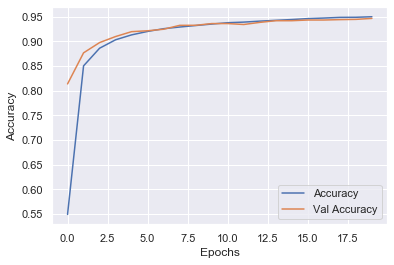

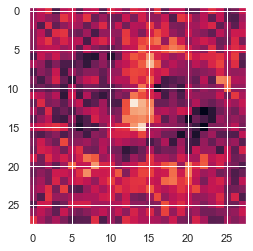

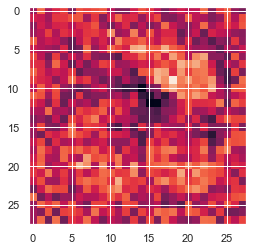

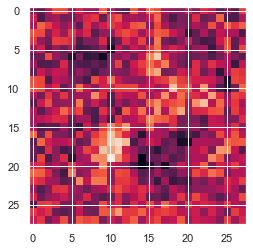

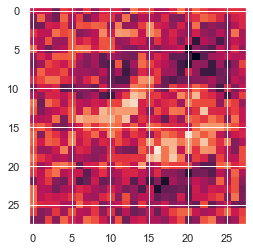

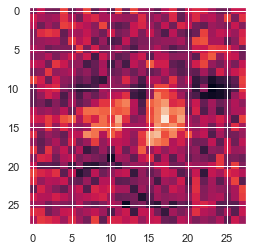

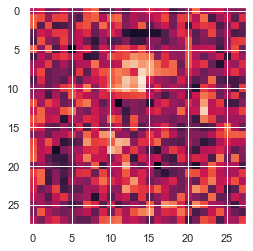

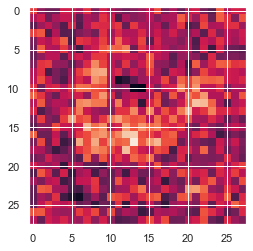

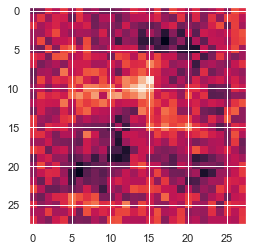

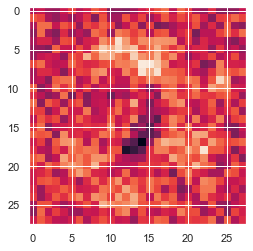

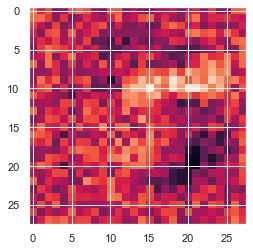

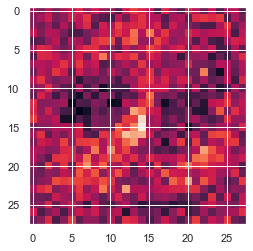

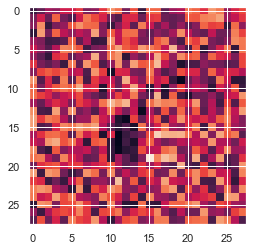

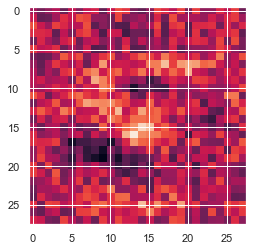

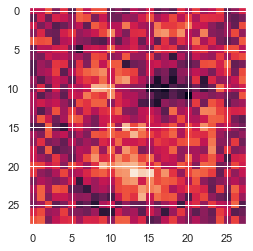

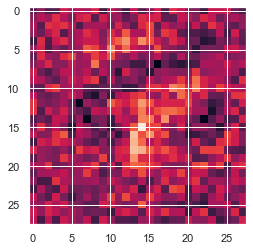

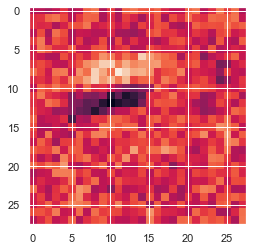

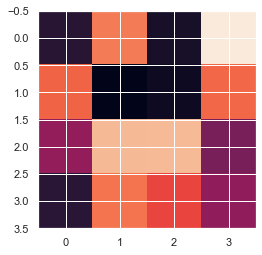

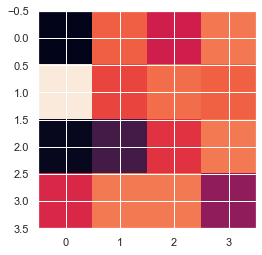

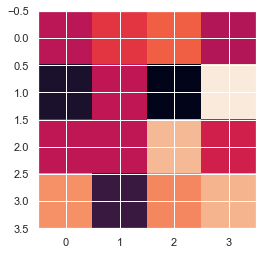

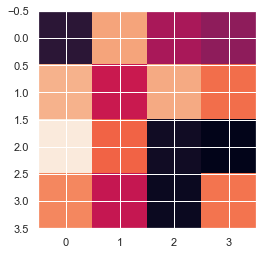

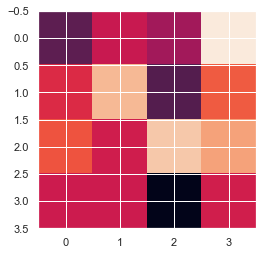

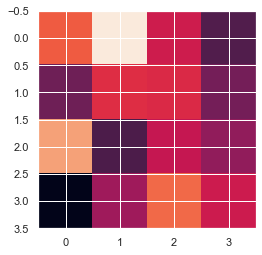

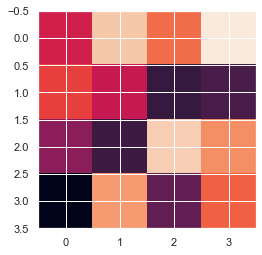

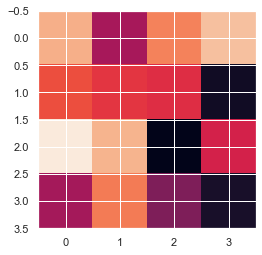

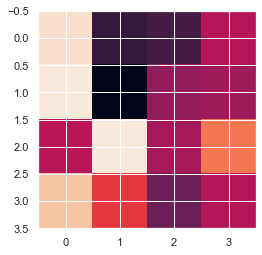

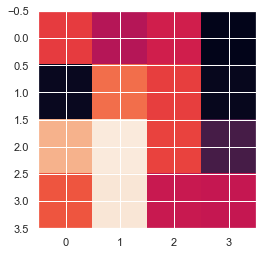

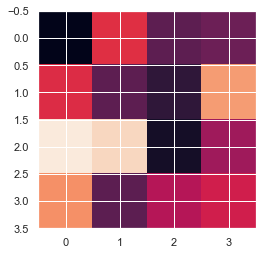

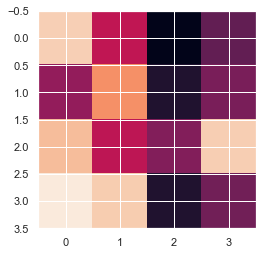

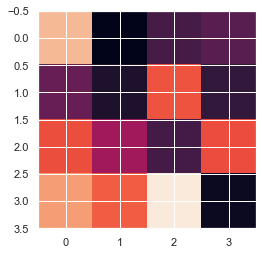

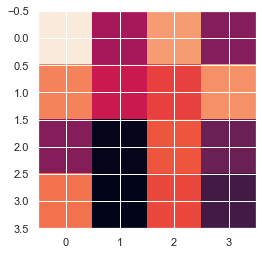

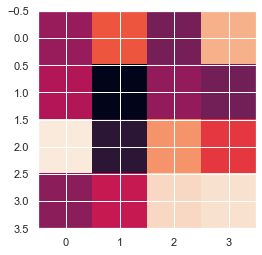

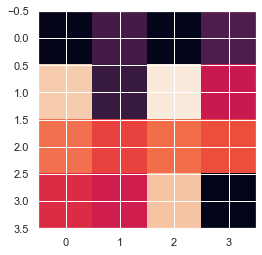

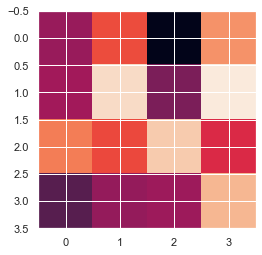

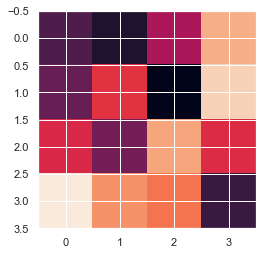

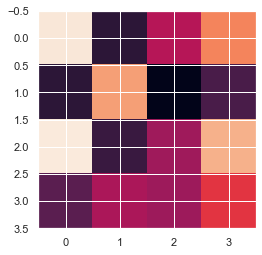

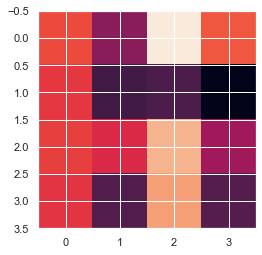

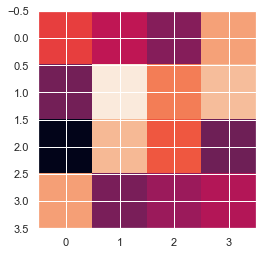

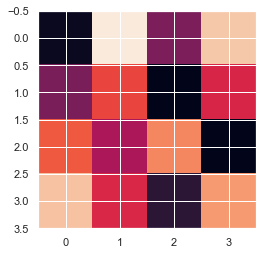

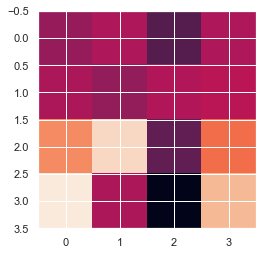

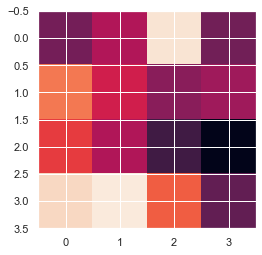

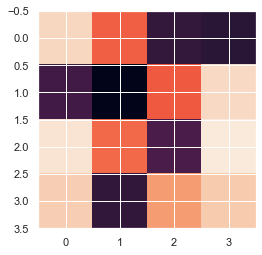

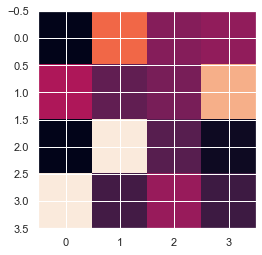

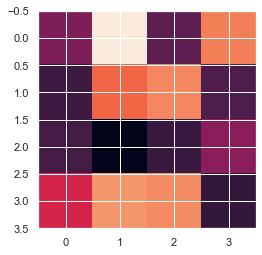

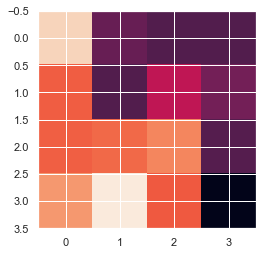

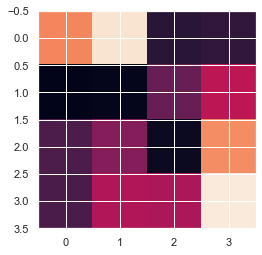

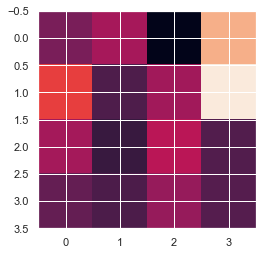

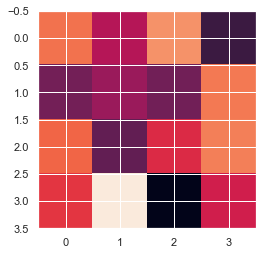

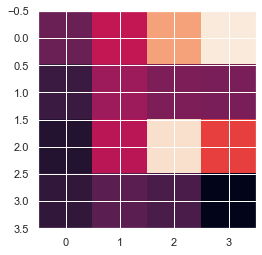

In [1]:
## your code here
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

sns.set()
batch_size = 64
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.
x_test /= 255.

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape, 'y_train')
print(y_test.shape, 'y_test')

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

history.history['epochs'] = range(epochs)

sns.lineplot(x='epochs', y='accuracy', data=history.history, label='Accuracy')
sns.lineplot(x='epochs', y='val_accuracy', data=history.history, label='Val Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

weights = []
for layer in model.layers:
    weights.append(layer.get_weights())

for i in range(weights[0][0].shape[1]):
    firstLayerImage = weights[0][0][:, i].reshape((28, 28))
    plt.imshow(firstLayerImage)
    plt.show()

for i in range(weights[1][0].shape[1]):
    secondLayerImage = weights[1][0][:, i].reshape((4, 4))
    plt.imshow(secondLayerImage)
    plt.show()

for i in range(weights[2][0].shape[1]):
    thirdLayerImage = weights[2][0][:, i].reshape((4, 4))
    plt.imshow(thirdLayerImage)
    plt.show()

60000 train samples
10000 test samples
(60000, 10) y_train
(10000, 10) y_test
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 1s 21us/step - loss: 1.6802 - accuracy: 0.4958 - val_loss: 1.1979 - val_accuracy: 0.7081

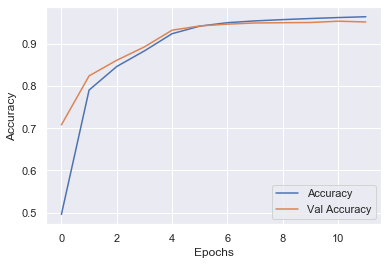

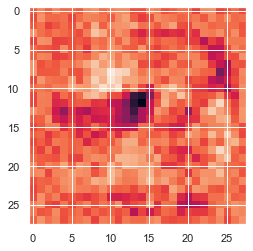

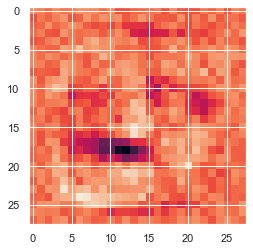

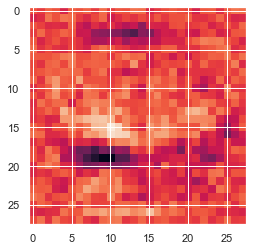

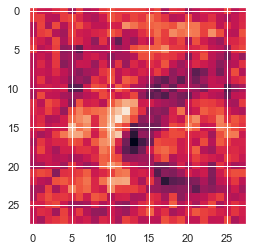

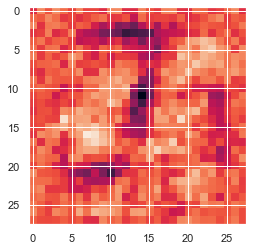

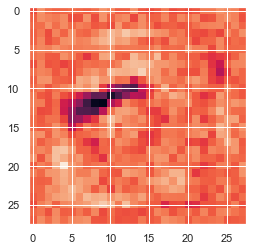

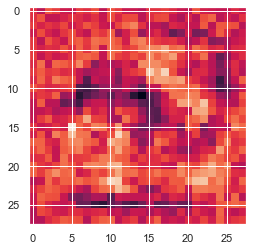

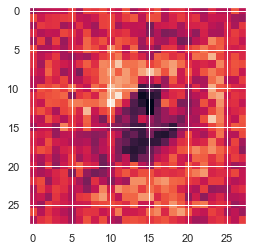

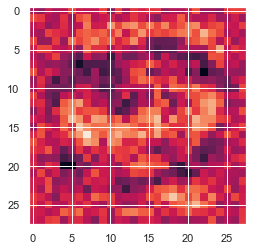

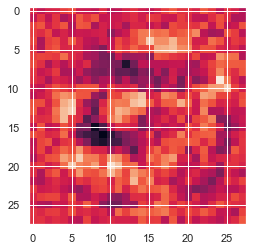

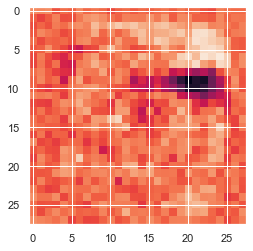

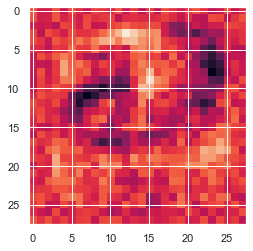

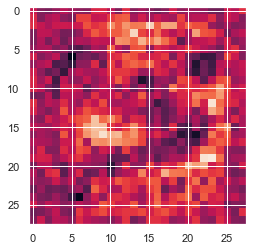

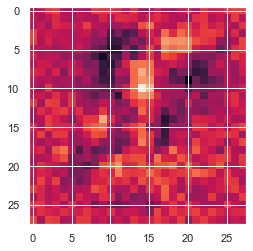

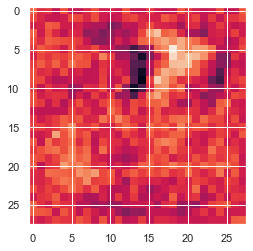

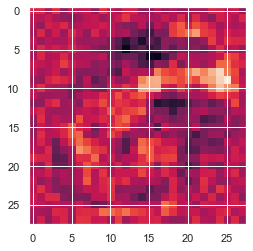

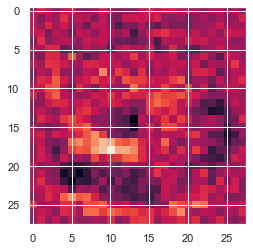

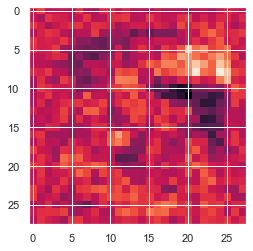

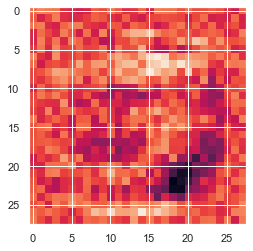

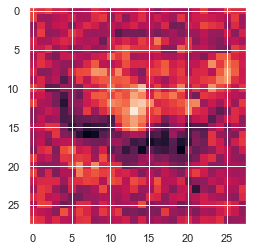

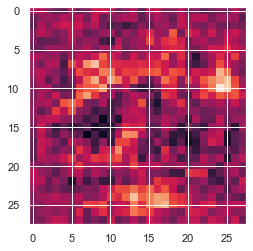

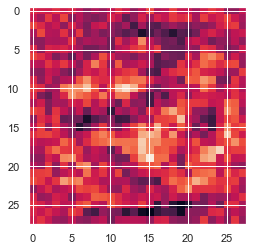

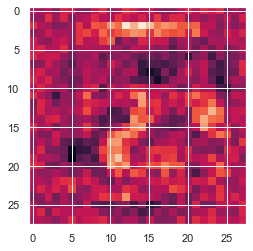

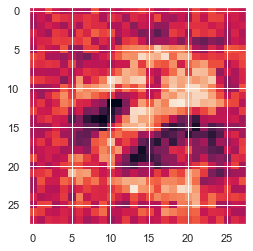

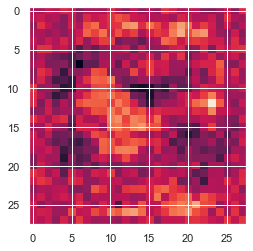

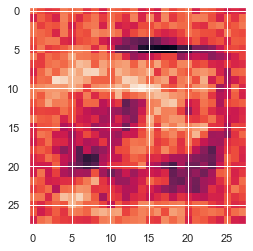

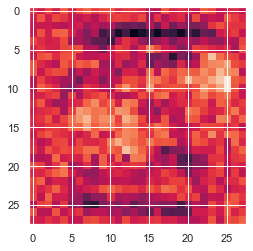

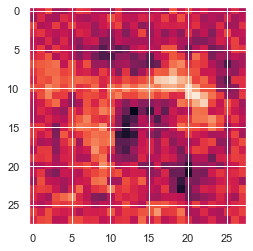

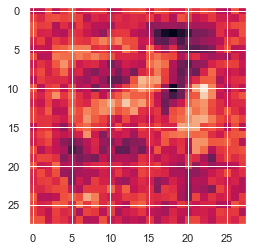

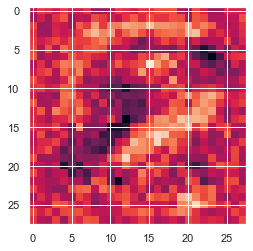

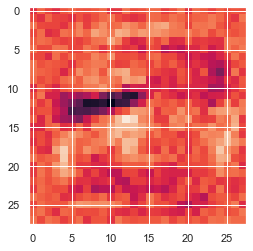

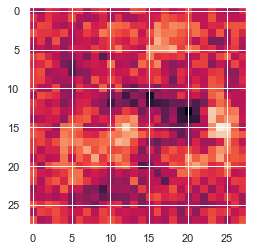

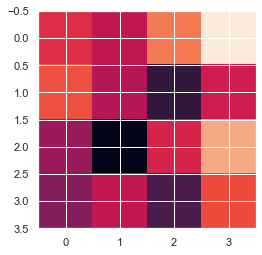

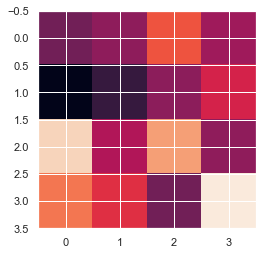

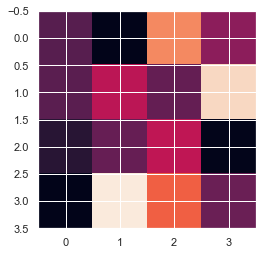

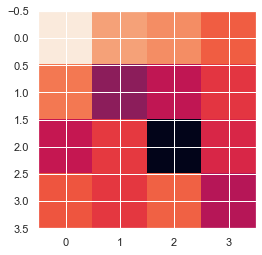

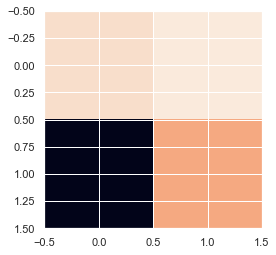

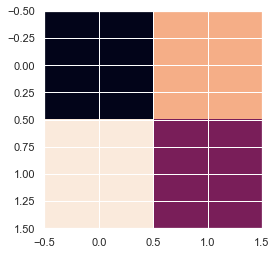

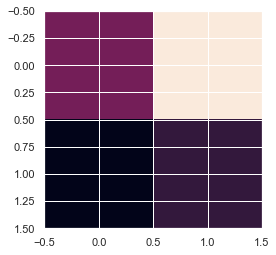

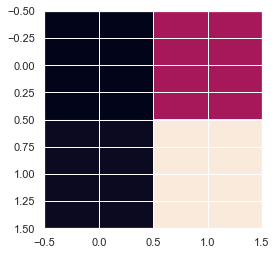

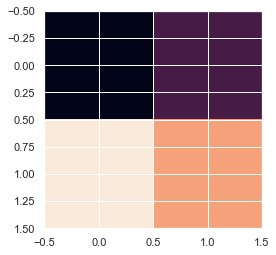

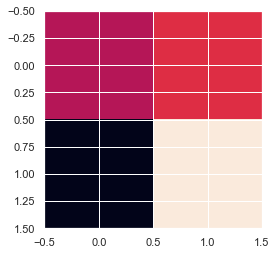

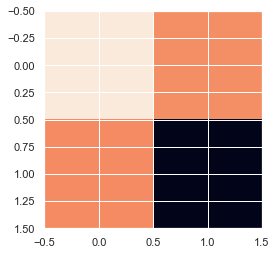

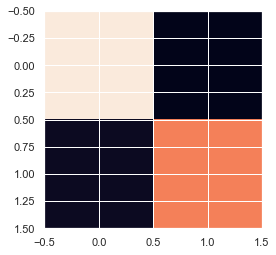

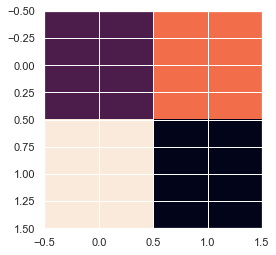

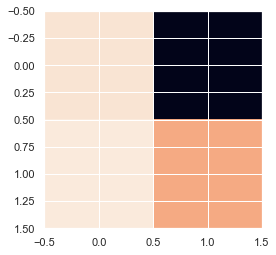

In [2]:
sns.set()
batch_size = 64
num_classes = 10
epochs = 12

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.
x_test /= 255.

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape, 'y_train')
print(y_test.shape, 'y_test')

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adadelta(),
    metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

history.history['epochs'] = range(epochs)

sns.lineplot(x='epochs', y='accuracy', data=history.history, label='Accuracy')
sns.lineplot(x='epochs', y='val_accuracy', data=history.history, label='Val Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

weights = []
for layer in model.layers:
    weights.append(layer.get_weights())

for i in range(weights[0][0].shape[1]):
    firstLayerImage = weights[0][0][:, i].reshape((28, 28))
    plt.imshow(firstLayerImage)
    plt.show()

for i in range(weights[2][0].shape[1]):
    secondLayerImage = weights[2][0][:, i].reshape((4, 4))
    plt.imshow(secondLayerImage)
    plt.show()


for i in range(weights[3][0].shape[1]):
    thirdLayerImage = weights[3][0][:, i].reshape((2, 2))
    plt.imshow(thirdLayerImage)
    plt.show()


2)

B) The neural network is simplifying images into a grid of colors within a specific pattern and is using the very simplified image
to do its classification on. Each layer distills features of the previous layer, and despite being unrecognizable from a human's persepctive,
each of the images is unique enough to use for classification. It's doing this by getting an average color value within a small area
of the picture, then getting the average of grids within another grid until we see images as above.

C) There is a similarity to the weights in that they are distilled to the same colors with different placements in each epoch.
The accuracy also appears to reach it's limit at a different rate. There is a major difference in that hte second network with an added layer
created a much cleaner separation between the quadrants as far as the colors were concerened.

### Q3. (4 points)

Load the MNIST dataset again and train a convolutional neural network with 2 Conv2D layers. What do the weights look like now? How do they compare to those in Q2? What about the accuracy you achieve now? If it is higher, explain why you were able to achieve better accuracy? If it is the same or lower, explain why that is too.


Hint:

**We were able to achieve 99.25% test accuracy after 12 epochs.** 

You can use: MaxPooling2D, Dropout, Faltten and Dense layers

In [6]:
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

sns.set()

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

history.history['epochs'] = range(epochs)

sns.lineplot(x='epochs', y='accuracy', data=history.history, label='Accuracy')
sns.lineplot(x='epochs', y='val_accuracy', data=history.history, label='Val Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

weights = []
for layer in model.layers:
    weights.append(layer.get_weights())

for i in range(weights[0][0].shape[1]):
    firstLayerImage = weights[0][0][:, i].reshape((6, 8))
    plt.imshow(firstLayerImage)
    plt.show()

for i in range(weights[1][0].shape[1]):
    secondLayerImage = weights[1][0][:, i].reshape((24, 32))
    plt.imshow(secondLayerImage)
    plt.show()

The accuracy improved by about 4% with the added layers. I think this is mostly due to the drop layers used to reduce overfitting,
preventing the accuracy from reaching too high, but also due to the inherently 2-dimensional nature of a Conv2d network making it better
at spatial relationships than a standard input layer.
